In [3]:
import pandas as pd

# Wczytaj dane
df = pd.read_csv("data_tables/features_from_rotated-cutted.csv")

# Nazwa kolumny ze ścieżką
path_column = df.columns[0]

# Wyodrębnij typ zbioru z kolumny ścieżki (niewrażliwe na wielkość liter)
df['set'] = df[path_column].str.lower().apply(lambda x: 
    'train' if 'train' in x else 
    'test' if 'test' in x else 
    'valid' if 'valid' in x else 
    'unknown')

# Podziel dane i usuń kolumny 'path' i 'set'
train = df[df['set'] == 'train'].drop(columns=[path_column, 'set'])
test = df[df['set'] == 'test'].drop(columns=[path_column, 'set'])
valid = df[df['set'] == 'valid'].drop(columns=[path_column, 'set'])

# Zapisz do plików
train.to_csv("train_features.csv", index=False)
test.to_csv("test_features.csv", index=False)
valid.to_csv("valid_features.csv", index=False)


In [ ]:
#TUTAJ SPRAWDZĘ, KTÓRE CECHY I ILE JEST NAJWAŻNIEJSZYCH

Train PCA:


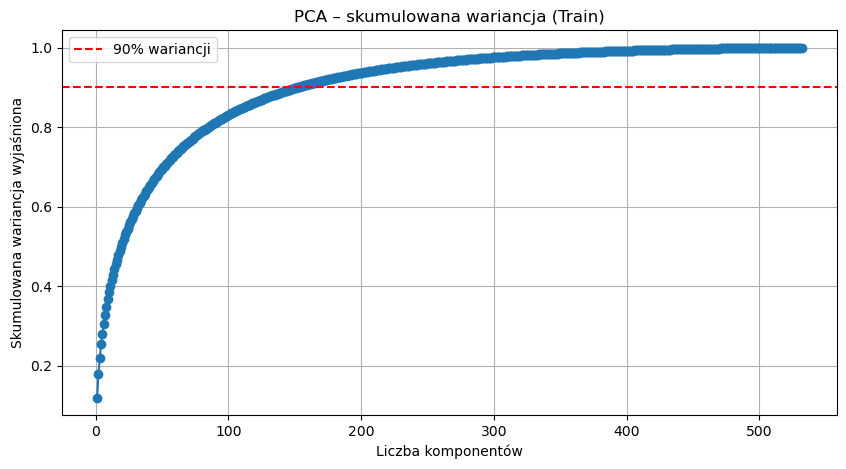

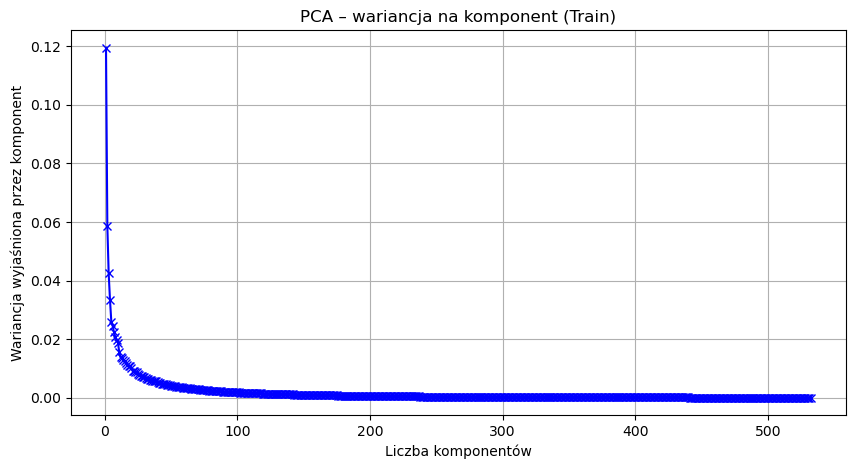

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Funkcja do PCA + wykresów
def analyze_pca(data, name="dataset"):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    pca = PCA().fit(data_scaled)
    cum_var = np.cumsum(pca.explained_variance_ratio_)
    single_var = pca.explained_variance_ratio_

    # Wykres 1: skumulowana wariancja
    plt.figure(figsize=(10,5))
    plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
    plt.xlabel('Liczba komponentów')
    plt.ylabel('Skumulowana wariancja wyjaśniona')
    plt.title(f'PCA – skumulowana wariancja ({name})')
    plt.grid(True)
    plt.axhline(0.9, color='red', linestyle='--', label='90% wariancji')
    plt.legend()
    plt.show()

    # Wykres 2: wariancja wyjaśniona przez każdą kolejną komponentę
    plt.figure(figsize=(10,5))
    plt.plot(range(1, len(single_var)+1), single_var, 'bx-')
    plt.xlabel('Liczba komponentów')
    plt.ylabel('Wariancja wyjaśniona przez komponent')
    plt.title(f'PCA – wariancja na komponent ({name})')
    plt.grid(True)
    plt.show()

    return pca  # zwraca obiekt, jeśli będziesz chciał go użyć

# Wczytanie danych
train_df = pd.read_csv("Train_features.csv")
test_df = pd.read_csv("test_features.csv")
valid_df = pd.read_csv("valid_features.csv")

# Zakładam, że wszystkie dane są numeryczne. Jeśli nie, dodaj .select_dtypes(np.number)
print("Train PCA:")
train_pca = analyze_pca(train_df, name="Train")

#print("Test PCA:")
#test_pca = analyze_pca(test_df, name="Test")

#print("Validation PCA:")
#valid_pca = analyze_pca(valid_df, name="Validation")


c:\Users\66891\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\66891\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\66891\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\66891\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

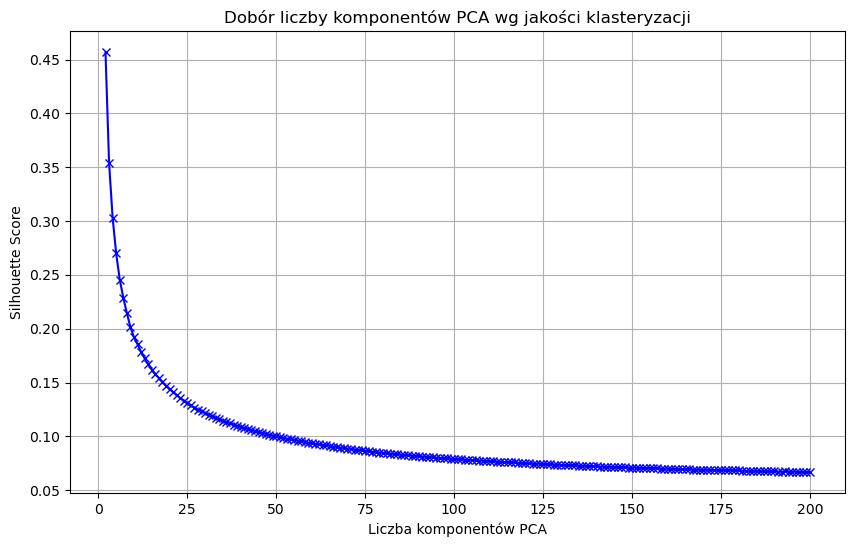

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Wczytaj dane
df = pd.read_csv('Train_features.csv')
X = StandardScaler().fit_transform(df)

comp_score_pairs = []

# Testujemy liczbę komponentów od 2 do np. 50
for i in range(2, 201):  # zaczynamy od 2, bo silhouette wymaga przynajmniej 2 wymiarów
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)

    # Klasteryzacja
    kmeans = KMeans(n_clusters=3, random_state=0)
    labels = kmeans.fit_predict(X_pca)

    # Obliczamy silhouette score
    score = silhouette_score(X_pca, labels)
    comp_score_pairs.append((i, score))

# Wykres
plt.figure(figsize=(10,6))
plt.plot(*zip(*comp_score_pairs), 'bx-')
plt.xlabel('Liczba komponentów PCA')
plt.ylabel('Silhouette Score')
plt.title('Dobór liczby komponentów PCA wg jakości klasteryzacji')
plt.grid(True)
plt.show()


| Liczba komponentów | Co oznacza                                                                             | Wniosek                                                                                                          |
| ------------------ | -------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| **≤10**            | Bardzo mało informacji, ale najlepszy Silhouette Score (czyli klastery bardzo wyraźne) | Idealne do testów klasyfikacji/klasteryzacji, ale może tracić cechy istotne dla dokładnego rozróżnienia gatunków |
| **\~100**          | Zawiera już większość zmienności, ale Silhouette jest niski                            | Dane są bardziej „naturalne”, ale granice między grupami są mniej wyraźne                                        |
| **>100**           | Minimalna poprawa jakości reprezentacji, ale bez zysku dla klasteryzacji               | Raczej nieopłacalne zwiększanie złożoności                                                                       |


In [6]:
# z pierwzzych wykresów wynika, że 100-170 wymiarów bedzie najlepiej. Silouette sugeruje 10 co mi sie nie za bardzo podoba, 
#ale niech juz będzie, sprawdzimy to

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

# Ścieżki do oryginalnych .csv
paths = {
    'train': 'Train_features.csv',
    'test': 'test_features.csv',
    'val': 'valid_features.csv'
}

# Wczytanie danych do słownika
dfs = {name: pd.read_csv(path, index_col=0) for name, path in paths.items()}

# Skalowanie danych (PCA wymaga standaryzacji)
scaler = StandardScaler()
X_all = pd.concat(dfs.values())
X_all_scaled = scaler.fit_transform(X_all)

# Przygotuj foldery
base_dir = 'TTVReady_to_teach'
os.makedirs(base_dir, exist_ok=True)

component_options = {
    'ten_components': 10,
    'hundred_components': 100
}

for folder, n_components in component_options.items():
    # Dopasuj PCA do wszystkich danych
    pca = PCA(n_components=n_components)
    X_pca_all = pca.fit_transform(X_all_scaled)
    
    # Podziel z powrotem na train/test/val
    lens = [len(df) for df in dfs.values()]
    cumulative_lengths = [0] + list(pd.Series(lens).cumsum())
    
    split_data = {
        name: X_pca_all[cumulative_lengths[i]:cumulative_lengths[i+1]]
        for i, name in enumerate(dfs.keys())
    }

    # Utwórz podfolder i zapisz zredukowane pliki
    folder_path = os.path.join(base_dir, folder)
    os.makedirs(folder_path, exist_ok=True)

    for name, data in split_data.items():
        df_pca = pd.DataFrame(data, index=dfs[name].index,
                              columns=[f'PC{i+1}' for i in range(n_components)])
        df_pca.to_csv(os.path.join(folder_path, f'{name}_pca{n_components}.csv'))
